# Decision Tree Classification:

- This works in specific flows [tree structure] inorder to perform the classification.
- simple & easy to visualization.
- This forms the following nodes:

1. Root Node: Starting point [representating the entire dataset].
2. Internal Nodes: These are decisions made on a feature.
3. Branches: Result of the descision [Flow from one decision to another].
4. Leaf Nodes: Represents the class labels.


Use Cases & Adv.:

- No need to normalize or standardize the data as Decision Tree is kinda non parametric based algorithm.
- This can handle unrelated, noisy or correlated features very well.


Disadv.:
- Overfitting issues. [fixes: setting `max_depth`]
- Small changes may lead to change in entire tree structure.

Not to Use when:
- Very small datasets with high feature cnt.
- Inconsistent data or smooth/probabilistic output.
- Real-Time prediction might get slowed down due to deep trees.

### Maths Behind the Decision Tree Classification:


Impurity Measures [Gini Impurity]:
- $Gini = 1 - (p_1^2 + p_2^2 + ... + p_n^2)$
- here $p_i$ are the proportion of the classes.
- Lower the Gini $\propto$ purer the node.

Entropy:
- $Entropy = - \sum_{i=1}^n(p_i\log_{2}{(p_i)})$

Then we calculate Information Gain: 
- $Information Gain = Entropy_{parent} - \sum(\frac{N_{child}}{N_{parent}}* Entropy_{child})$


Internal DT Steps:

1. Start at the root.
2. For each feature, calculate split quality (Gini/Entropy).
3. Choose the best feature + threshold.
4. Split the dataset.
5. Repeat recursively for child nodes. 🔁


### Key Hyperparameters:


`max_depth` : Limiting the max. depth of the tree. [Preventing overfitting]

`min_samples_split`: setting up the minimum no. of samples required to split an internal node. [increasing value leads to reduction of impact of noise in training data]

`max_features`: Limits the no. of features considered for splitting at each node.

`class_weights`: This addresses class imbalances by assigning different weights to classes during the split selection process.


In [2]:
import numpy as np, pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [12]:
data = load_iris()
X, y = data.data, data.target

# data = pd.read_csv('./datasets/cricket_knn_indian_players_balanced.csv')
# data

# X = data[['temperature', 'opposition_strength']]
# y = data['best_batter']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)


In [18]:
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

This is how the algorithm of DT flow looks like.

[Text(0.375, 0.875, 'x[2] <= 2.35\ngini = 0.662\nsamples = 75\nvalue = [21.0, 27.0, 27.0]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 21\nvalue = [21, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 54\nvalue = [0, 27, 27]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[2] <= 5.35\ngini = 0.231\nsamples = 30\nvalue = [0, 26, 4]'),
 Text(0.125, 0.125, 'gini = 0.133\nsamples = 28\nvalue = [0, 26, 2]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.08\nsamples = 24\nvalue = [0, 1, 23]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 22\nvalue = [0, 0, 22]')]

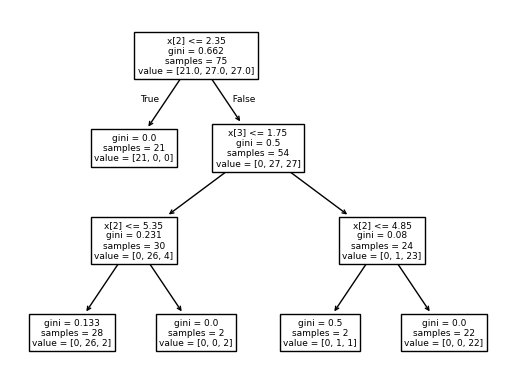

In [21]:
tree.plot_tree(dt_model)

---

### Implementing the Decision Tree:

- Kaggle Datasets: [Diabetes Data 🔗](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv)

In [ ]:
# Importing 
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
# 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [29]:
data = pd.read_csv('./datasets/diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [27]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [81]:
fig = go.Figure()
fig.add_trace(go.Pie(labels = ['Safe', 'Diabetic'], 
                     values= data['Outcome'].value_counts(),
                     ))
fig.update_layout(title = "Distribution of Outcomes [Target Classes]")
py.iplot(fig)

In [37]:
data.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [50]:
# cols = ['BloodPressure', 'SkinThickness', 'Glucose', 'Insulin', 'BMI']

# data[cols] = data[cols].replace(0, np.nan)

In [80]:
from matplotlib import axes


fig = px.imshow(data.corr(), text_auto=True)
py.iplot(fig)

In [56]:
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Load and fit:

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# prediction:
y_pred = clf.predict(X_test)

Accuracy & clf report

In [77]:
print(f"ACCURACY: {accuracy_score(y_test, y_pred)}")
print(f"ACCURACY: {classification_report(y_test, y_pred)}")

ACCURACY: 0.7186147186147186
ACCURACY:               precision    recall  f1-score   support

           0       0.81      0.75      0.78       151
           1       0.58      0.66      0.62        80

    accuracy                           0.72       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.72      0.72       231



'-'

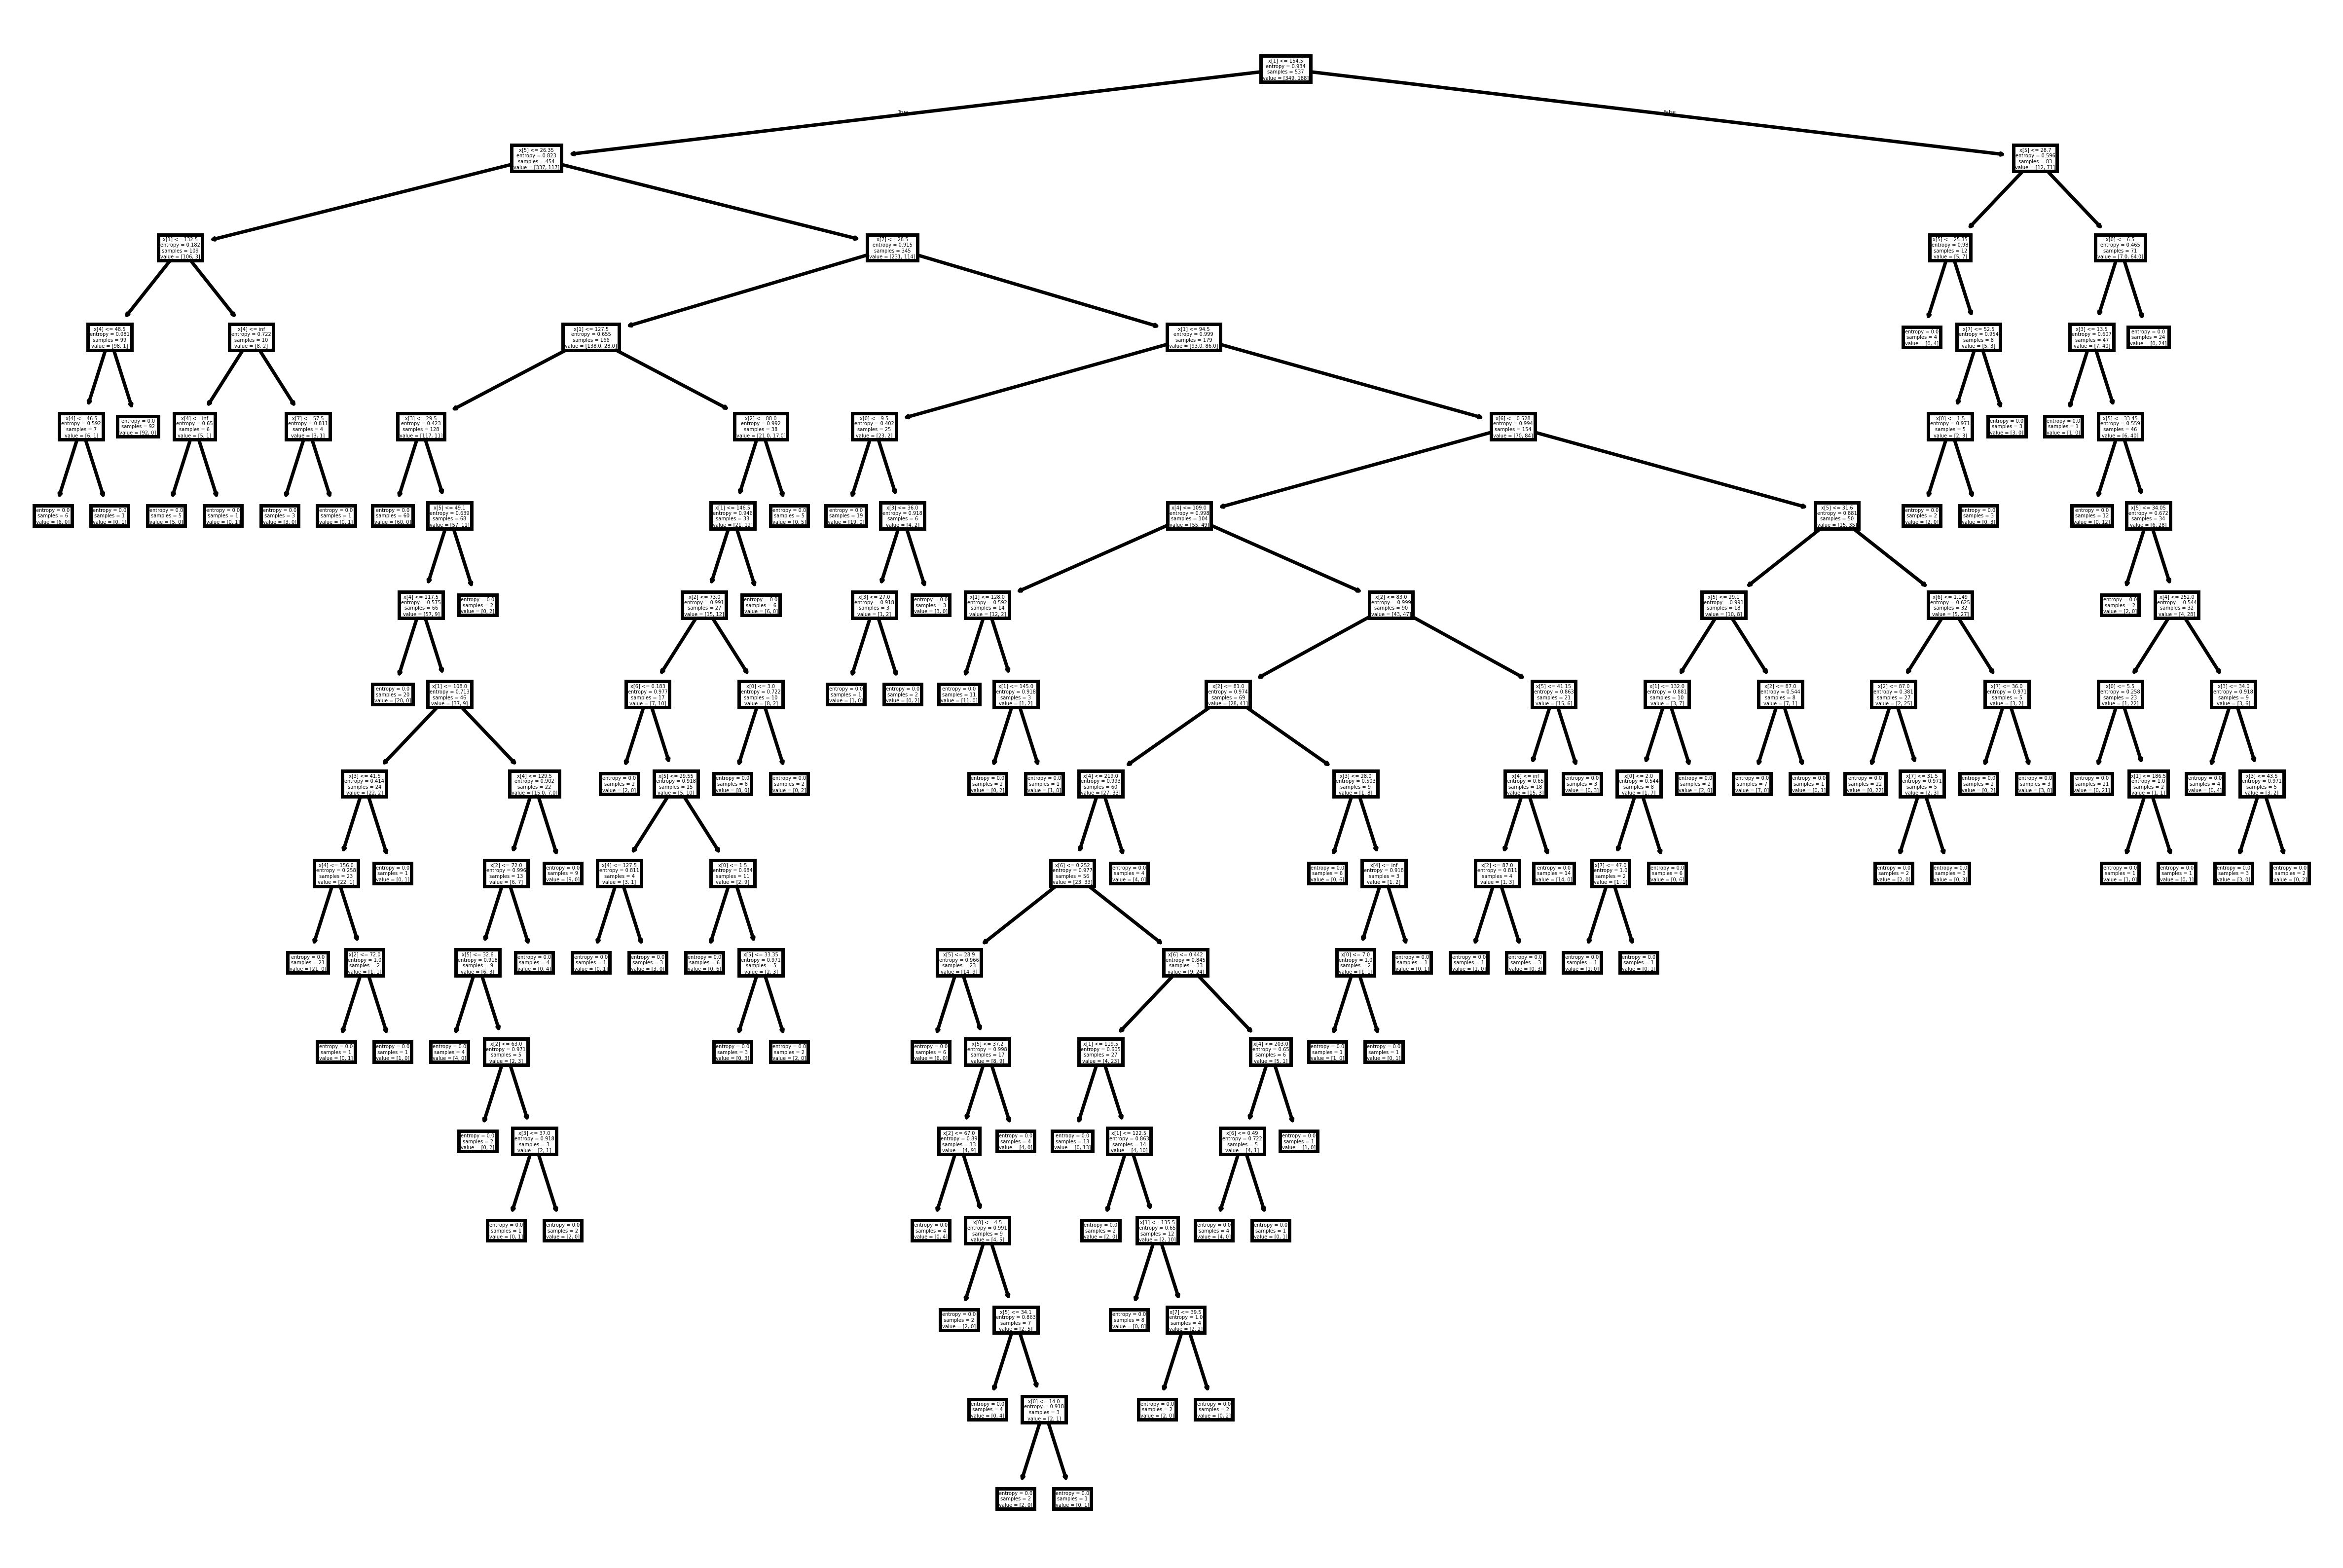

In [79]:
plt.figure(figsize=(12,8), dpi=500)
plot_tree(clf)
'-'

---

By Kirtan Ghelani @SculptSoft